#  Analisi Incidenti Aerei (1919-2023)

## Contesto
La neonata **IASS (International Alliance for Safe Skies)** ha incaricato di svolgere
un'accurata analisi di tutti gli incidenti aerei verificatisi dal **1919 al 2023**.

Il dataset contiene quasi **25.000 incidenti** registrati a livello globale.

##  Dataset

| Colonna | Descrizione |
|---|---|
| `date` | Data dell'incidente |
| `type` | Tipo di velivolo |
| `registration` | Codice di registrazione del velivolo |
| `operator` | Operatore del velivolo |
| `fatalities` | Numero di morti |
| `location` | Luogo dell'incidente |
| `country` | Nazione dell'incidente |
| `cat` | Categoria dell'incidente (classificazione ASN) |

##  Obiettivo
Analizzare i dati storici sugli incidenti aerei per identificare trend temporali,
operatori e aree geografiche più a rischio, e categorie di incidenti più frequenti.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#fare upload del file ogni volta che si apre google colab
url = "https://raw.githubusercontent.com/EliaVenturini/professionai-projects/main/aviation-accidents.csv"
aviation = pd.read_csv(url)
aviation.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


#PULIZIA DATASET

In [52]:
valid_date = aviation[
    (aviation["country"] != "Unknown country") &
    (aviation["date"] != "date unk.") &
    aviation["fatalities"].notna() &
    aviation["registration"].notna() &
    (aviation["registration"] != "NaN") &
    aviation["operator"].notna() &
    (aviation["year"] != "unknown") &
    (aviation["location"].notna())
]
valid_dataframe=pd.DataFrame(valid_date)
#estraggo i giorni della settimana
valid_dataframe['day_of_week'] = pd.to_datetime(valid_dataframe['date'], errors='coerce', format="%d-%b-%Y").dt.day_name()
#trasformo il dato da object a datetime
valid_dataframe["date"]=pd.to_datetime(valid_dataframe["date"], errors="coerce")
valid_dataframe.info()

/tmp/ipython-input-3679999886.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  valid_dataframe["date"]=pd.to_datetime(valid_dataframe["date"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
Index: 18595 entries, 62 to 23966
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18428 non-null  datetime64[ns]
 1   type          18595 non-null  object        
 2   registration  18595 non-null  object        
 3   operator      18595 non-null  object        
 4   fatalities    18595 non-null  object        
 5   location      18595 non-null  object        
 6   country       18595 non-null  object        
 7   cat           18595 non-null  object        
 8   year          18595 non-null  object        
 9   day_of_week   18428 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.6+ MB


In [53]:
print(valid_dataframe.isnull().sum())

date            167
type              0
registration      0
operator          0
fatalities        0
location          0
country           0
cat               0
year              0
day_of_week     167
dtype: int64


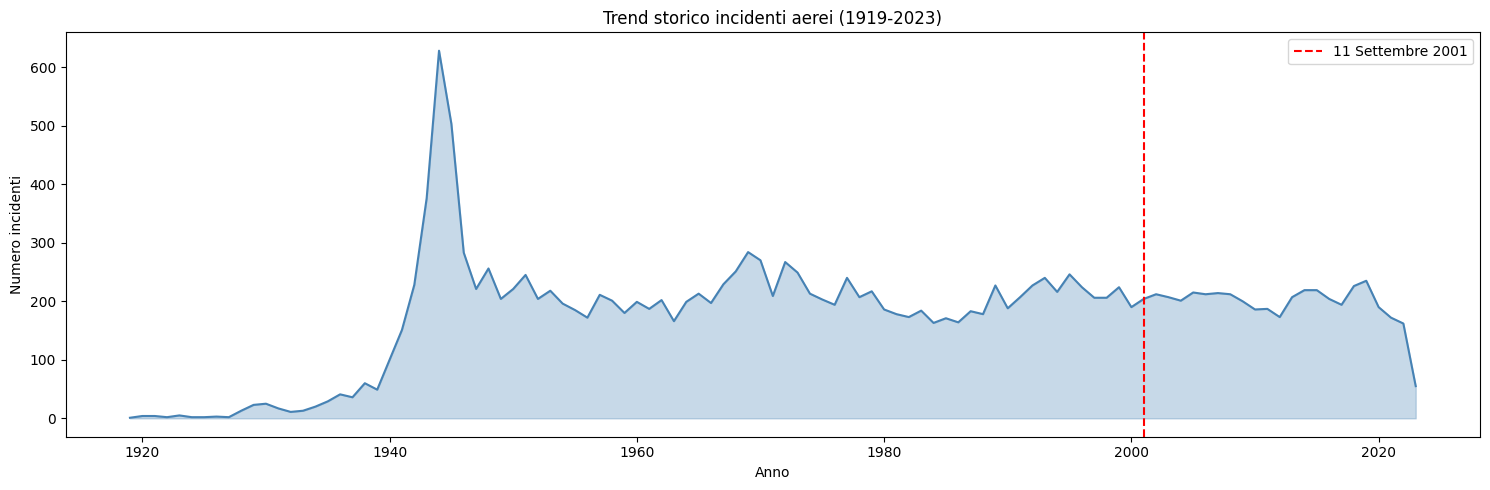

In [69]:
# Trend storico incidenti per anno (1919-2023)
incidents_per_year = valid_dataframe.groupby('year')['date'].count().reset_index()
incidents_per_year.columns = ['year', 'count']
incidents_per_year['year'] = incidents_per_year['year'].astype(int)
incidents_per_year = incidents_per_year.sort_values('year')

plt.figure(figsize=(15, 5))
plt.plot(incidents_per_year['year'], incidents_per_year['count'], color='steelblue', linewidth=1.5)
plt.fill_between(incidents_per_year['year'], incidents_per_year['count'], alpha=0.3, color='steelblue')
plt.title("Trend storico incidenti aerei (1919-2023)")
plt.xlabel("Anno")
plt.ylabel("Numero incidenti")
plt.axvline(x=2001, color='red', linestyle='--', label='11 Settembre 2001')
plt.legend()
plt.tight_layout()
plt.show()

# In quale nazione si sono verificati più incidenti?

In [54]:
name_counts = valid_dataframe['country'].value_counts()
print(name_counts)

country
USA          3813
Russia       1191
Canada        782
U.K.          714
Brazil        566
             ... 
Cook Isl.       1
Kosovo          1
Burundi         1
Eswatini        1
Macau           1
Name: count, Length: 229, dtype: int64


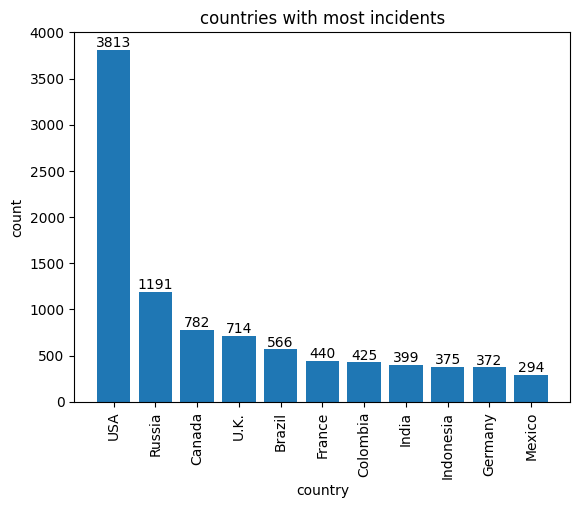

In [55]:
dataframe_country=name_counts.reset_index()
dataframe_country.columns=["country","count"]

bars =plt.bar(dataframe_country["country"].loc[:10], dataframe_country["count"].loc[:10])

plt.xticks(rotation=90)
plt.title("countries with most incidents")
plt.xlabel("country")
plt.ylabel("count")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')
    #int(yval) TESTO DELL'ETICHETTA

plt.show()

# Gli incidenti avvengono più di frequente durante determinati giorni della settimana?

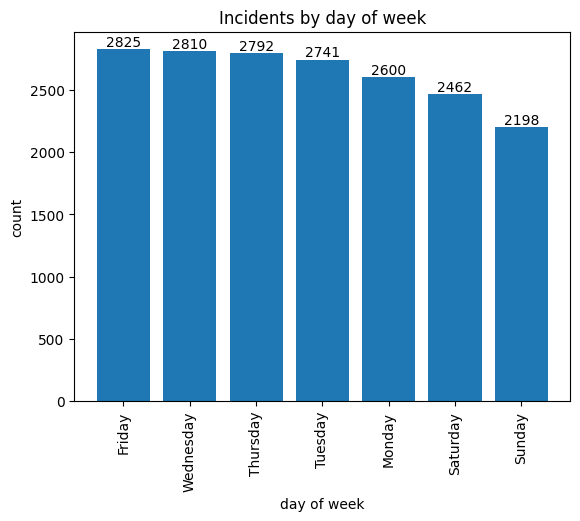

In [56]:
day_counts=valid_dataframe['day_of_week'].value_counts()
bars =plt.bar(day_counts.index,day_counts.values)

plt.xticks(rotation=90)
plt.title("Incidents by day of week")
plt.xlabel("day of week")
plt.ylabel("count")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

plt.show()

#  Quali operatori hanno il minor numero di incidenti registrati?

In [57]:
location=valid_dataframe["operator"].value_counts()
location=location.reset_index()
location.columns=["operator","count"]
location=location.sort_values(ascending=True, by="count")
safest_location=location.head(10).reset_index(drop=True)
safest_location

,operator,count
0,Lauda Air,1
1,Cargair,1
2,Aerolineas Marcos,1
3,Provincial Express,1
4,Adikarto Printindo,1
5,United Executive Jet,1
6,Romavia,1
7,"MarkAir Express, opb Hermens Air",1
8,Sudania,1
9,Ferruzzi,1


 Nota: un basso numero di incidenti può indicare sia sicurezza che bassa operatività

# Top 10 operatori con più morti totali

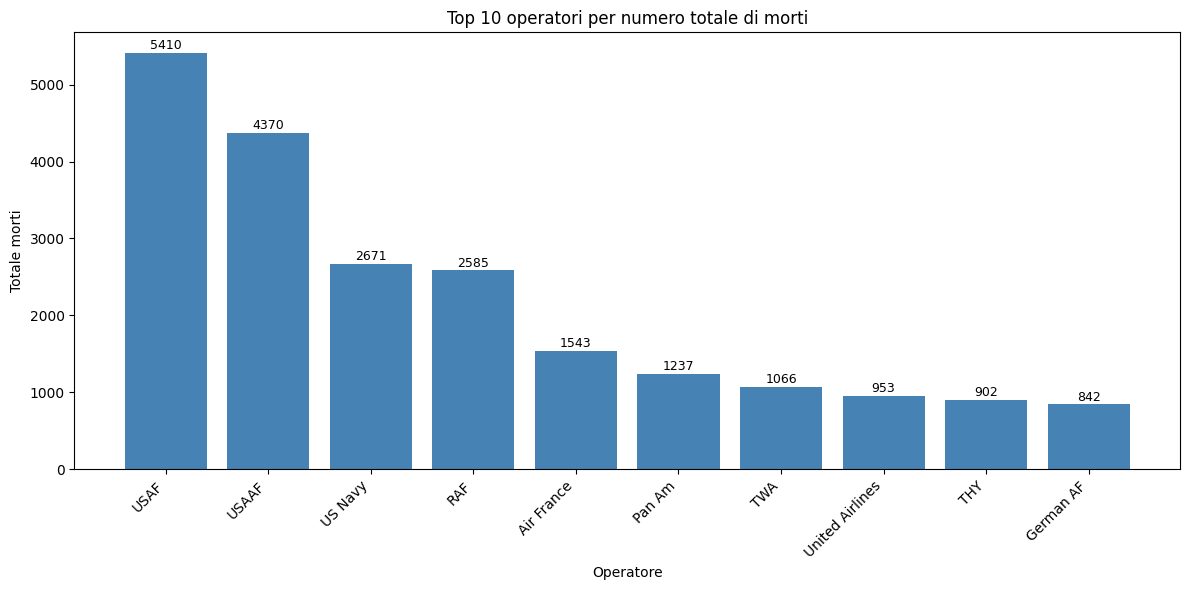

In [72]:
valid_dataframe['fatalities'] = pd.to_numeric(valid_dataframe['fatalities'], errors='coerce')

fatalities_by_operator = valid_dataframe.groupby('operator')['fatalities'].sum().reset_index()
fatalities_by_operator = fatalities_by_operator.sort_values(ascending=False, by='fatalities').head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(fatalities_by_operator['operator'], fatalities_by_operator['fatalities'], color='steelblue')

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 operatori per numero totale di morti")
plt.xlabel("Operatore")
plt.ylabel("Totale morti")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+10, int(yval), va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Quale tipo di velivolo ha causato più morti?

In [58]:
vehicle_fatalities = valid_dataframe.groupby("type")["fatalities"].sum().reset_index()
vehicle_fatalities = vehicle_fatalities.sort_values(ascending=False, by="fatalities")
vehicle_fatalities.head(10)

,type,fatalities
2486,Lockheed L-1049H-01-06-162 Super Constellation,996
129,Antonov An-12BK,986+ 30000400077060007041005098000
1128,Bristol 175 Britannia 312,98300
2523,Lockheed OP-2E Neptune,982
326,BN-2A-21 Islander,9741500281090027403144000010300061000337032300...
487,Boeing 707-441,970
1600,Douglas AC-47D,96071067007778063008
1982,Fairchild R4Q-1 Flying Boxcar (C-119C),9526
420,Boeing 707-123B,950028
1812,Douglas DC-8-43,9464120115073


# Mortalità per categoria di incidente (classificazione ASN)

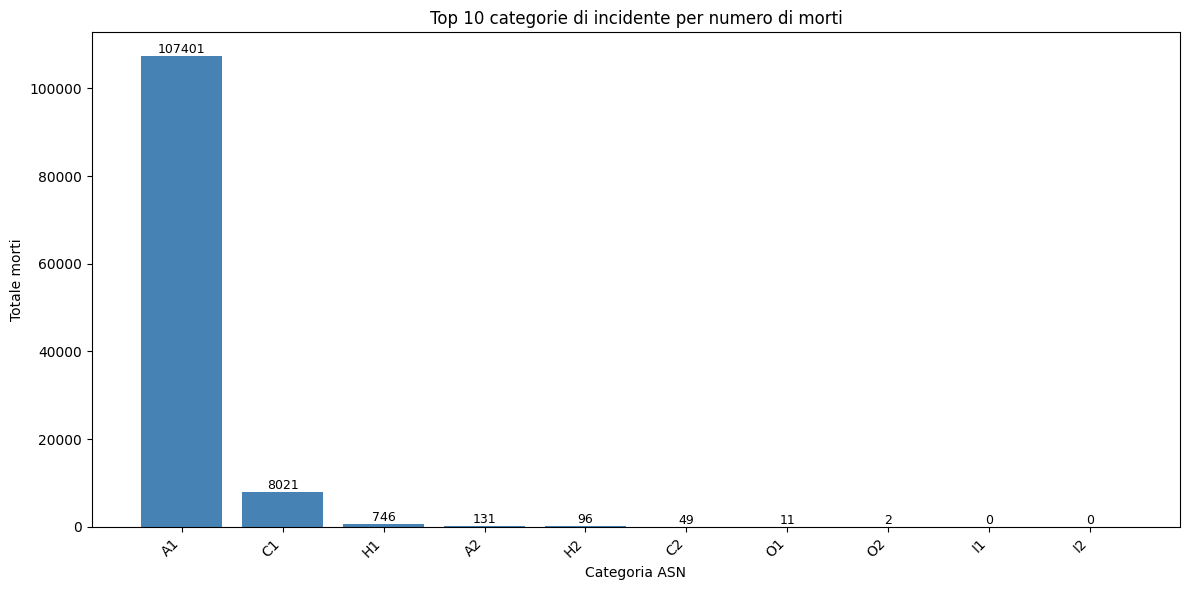

In [70]:
valid_dataframe['fatalities'] = pd.to_numeric(valid_dataframe['fatalities'], errors='coerce')

fatalities_by_cat = valid_dataframe.groupby('cat')['fatalities'].sum().reset_index()
fatalities_by_cat = fatalities_by_cat.sort_values(ascending=False, by='fatalities').head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(fatalities_by_cat['cat'], fatalities_by_cat['fatalities'], color='steelblue')

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 categorie di incidente per numero di morti")
plt.xlabel("Categoria ASN")
plt.ylabel("Totale morti")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+10, int(yval), va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Come si sono evoluti gli incidenti dopo l'11 Settembre?

In [59]:
valid_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18595 entries, 62 to 23966
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18428 non-null  datetime64[ns]
 1   type          18595 non-null  object        
 2   registration  18595 non-null  object        
 3   operator      18595 non-null  object        
 4   fatalities    18595 non-null  object        
 5   location      18595 non-null  object        
 6   country       18595 non-null  object        
 7   cat           18595 non-null  object        
 8   year          18595 non-null  object        
 9   day_of_week   18428 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.6+ MB


In [60]:
valid_date_after11=valid_dataframe[valid_dataframe["date"]>pd.Timestamp('11-SEP-2001')]
valid_date_after11

,date,type,registration,operator,fatalities,location,country,cat,year,day_of_week
19407,2001-09-12,Let L-410UVP-E,XA-ACM,Aero Ferinco,19,near ChichÃ©n ItzÃ¡ A...,Mexico,A1,2001,Wednesday
19408,2001-09-12,DHC-3T Vazar Turbine Otter,C-FQOS,Labrador Airways,0,Goose (Otter Cre...,Canada,A1,2001,Wednesday
19409,2001-09-14,Beech 1900C,C-GSKC,SkyLink Express,0,St. John's Airpo...,Canada,A1,2001,Friday
19410,2001-09-15,Fokker 100,PT-MRN,TAM Brasil,1,"near Belo Horizonte, MG",Brazil,A2,2001,Saturday
19411,2001-09-16,Boeing 737-2C3,PP-CJN,Varig,0,GoiÃ¢nia-Santa G...,Brazil,A1,2001,Sunday
...,...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023,Thursday
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023,Thursday
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023,Friday
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023,Sunday


In [61]:
valid_date_before11=valid_dataframe[valid_dataframe["date"]<pd.Timestamp('11-SEP-2001')]
valid_date_before11

,date,type,registration,operator,fatalities,location,country,cat,year,day_of_week
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,Monday
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,Monday
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,Wednesday
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,Wednesday
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920,Tuesday
...,...,...,...,...,...,...,...,...,...,...
19398,2001-09-05,Tupolev Tu-154M,UK-85776,Uzbekistan Airways,0,Ufa Airport (UFA),Russia,A2,2001,Wednesday
19399,2001-09-05,Boeing 777-236ER,G-VIIK,British Airways,0+ 1,Denver Internati...,USA,A2,2001,Wednesday
19400,2001-09-05,Lockheed C-130E Hercules,68-10934,USAF,0,"near Laurinburg, NC",USA,A2,2001,Wednesday
19401,2001-09-06,Saab 340B,XA-ACK,Aerolitoral,0,near Tijuana,Mexico,A1,2001,Thursday


In [62]:
#ho ottenuto 2 differenti dataset prima e dopo l'11 settembre
# numero di incidenti medi annuo (prima e dopo 11 sep)
# numero di incidenti medi annuo in america (prima e dopo 11 sep)

In [63]:
valid_date_after11 = valid_date_after11.copy()
valid_date_after11['year'] = valid_date_after11['date'].dt.year.astype(int)
mean_incidents_per_year = valid_date_after11.groupby('year')['date'].count().reset_index()
mean_incidents_per_year=mean_incidents_per_year.sort_values(ascending=False, by="year")

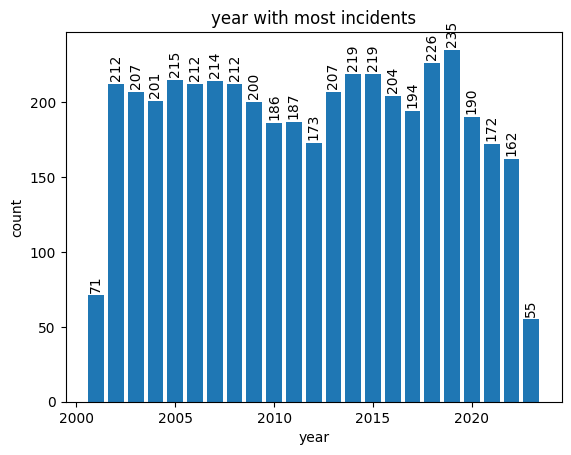

In [64]:
mean_incidents_per_year.columns = ["year", "count of incident"]

bars =plt.bar(mean_incidents_per_year["year"],mean_incidents_per_year["count of incident"])

plt.title("year with most incidents")
plt.xlabel("year")
plt.ylabel("count")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+2, int(yval), va='bottom', ha='center', fontsize=10, color='black', rotation=90)

plt.show()

In [65]:
valid_date_after11.sort_values(ascending=False, by="date")
#I DATI LDEL 2001 E DEL 2023 NON POSSONO ESSERE PRESI IN CONSIDERAZIONE IN QUANTO IN ENTRAMBI I CASI NON SI HANNO I DATI DELL'ANNO COMPLETO

,date,type,registration,operator,fatalities,location,country,cat,year,day_of_week
23966,2023-05-15,Learjet 35A,D-CGFQ,GFD,2,Hohn Air Base,Germany,A1,2023,Monday
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023,Sunday
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023,Friday
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023,Thursday
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023,Thursday
...,...,...,...,...,...,...,...,...,...,...
19411,2001-09-16,Boeing 737-2C3,PP-CJN,Varig,0,GoiÃ¢nia-Santa G...,Brazil,A1,2001,Sunday
19410,2001-09-15,Fokker 100,PT-MRN,TAM Brasil,1,"near Belo Horizonte, MG",Brazil,A2,2001,Saturday
19409,2001-09-14,Beech 1900C,C-GSKC,SkyLink Express,0,St. John's Airpo...,Canada,A1,2001,Friday
19408,2001-09-12,DHC-3T Vazar Turbine Otter,C-FQOS,Labrador Airways,0,Goose (Otter Cre...,Canada,A1,2001,Wednesday


In [66]:
valid_date_before11 = valid_date_before11.copy()
valid_date_before11['year'] = valid_date_before11['date'].dt.year.astype(int)
mean_incidents_per_year = valid_date_before11.groupby('year')['date'].count().reset_index()
mean_incidents_per_year=mean_incidents_per_year.sort_values(ascending=False, by="date")
mean_incidents_per_year

,year,date
25,1944,628
26,1945,503
24,1943,376
50,1969,284
27,1946,283
...,...,...
8,1927,2
3,1922,2
6,1925,2
5,1924,2


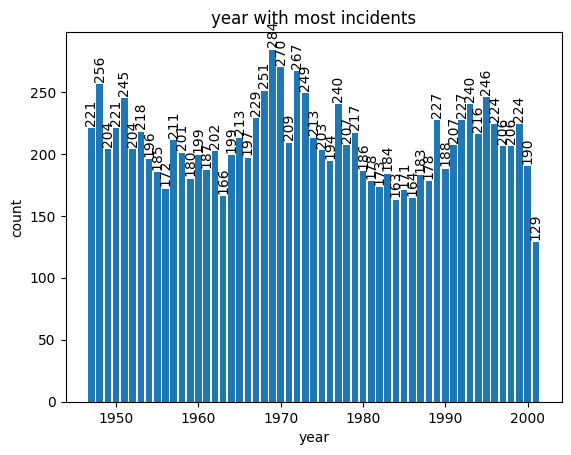

In [67]:
mean_incidents_per_year.columns = ["year", "count of incident"]
mean_incidents_per_year=mean_incidents_per_year[mean_incidents_per_year["year"]>1946]

bars =plt.bar(mean_incidents_per_year["year"],mean_incidents_per_year["count of incident"])

plt.title("year with most incidents")
plt.xlabel("year")
plt.ylabel("count")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+2, int(yval), va='bottom', ha='center', fontsize=10, color='black', rotation=90)

plt.show()